In [13]:
from diffusion import experiments
from diffusion.experiments import InferenceExperiment, InferenceExperimentConfiguration
import logging
import os
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler
import torch

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps")
prompt = "a photo of an astronaut riding a horse on mars"

# set notebook autoload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Check SD2.1

In [ ]:


scheduler = EulerDiscreteScheduler.from_config("stabilityai/stable-diffusion-2-1", subfolder= "scheduler")
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", scheduler=scheduler, use_safetensors=True, torch_dtype=torch.float16)
# pipe.enable_attention_slicing()



/opt/miniconda3/envs/projectMSGAI/lib/python3.11/site-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
Loading pipeline components...: 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


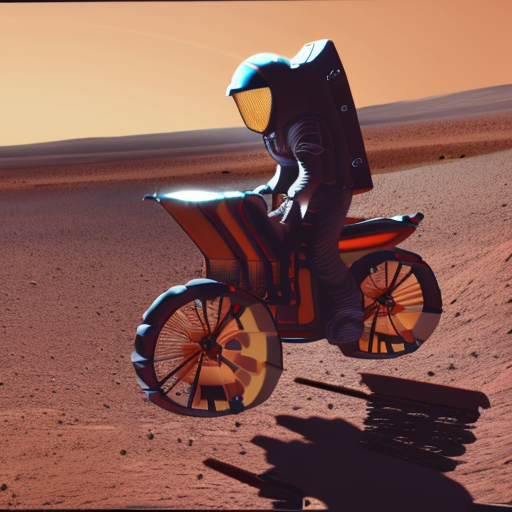

In [6]:
pipe.to(device)
image = pipe(prompt, height=512, width=512).images[0]

display(image)

## Check SD1.5

Keyword arguments {'use_saftensors': True} are not expected by StableDiffusionPipeline and will be ignored.
100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


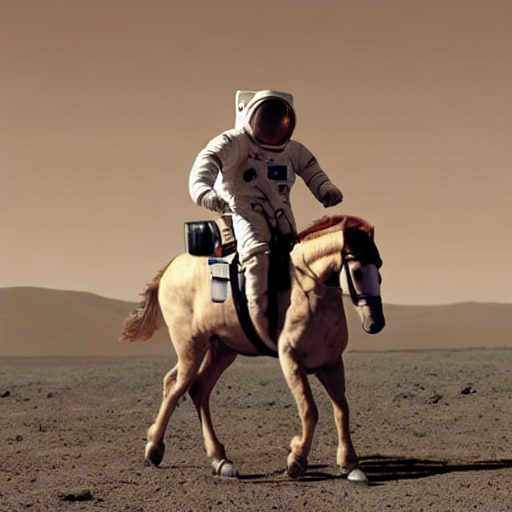

In [29]:
pipe = StableDiffusionPipeline.from_pretrained('stable-diffusion-v1-5/stable-diffusion-v1-5', use_saftensors=True, torch_dtype=torch.float16)
pipe.to(device)
image = pipe(prompt).images[0]
display(image)

## Check DeepCache

In [30]:
from DeepCache import DeepCacheSDHelper
helper = DeepCacheSDHelper(pipe)
helper.set_params(cache_interval=3, cache_branch_id=0)
helper.enable()


100%|██████████| 50/50 [00:15<00:00,  3.32it/s]


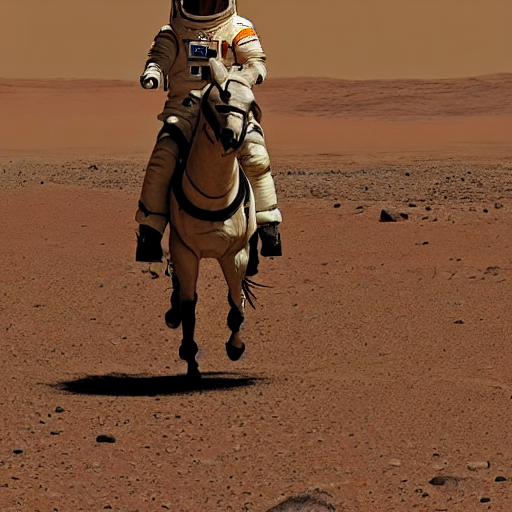

In [31]:
image = pipe(prompt).images[0]
display(image)

## Check miniSD

In [36]:
pipe = StableDiffusionPipeline.from_pretrained("lambdalabs/miniSD-diffusers", torch_dtype=torch.bfloat16)
pipe.to(device)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
cache = DeepCacheSDHelper(pipe)
cache.set_params(cache_interval=3, cache_branch_id=0)
cache.enable()


Loading pipeline components...:  43%|████▎     | 3/7 [00:01<00:01,  2.25it/s]An error occurred while trying to fetch /Users/aleja/.cache/huggingface/hub/models--lambdalabs--miniSD-diffusers/snapshots/26ed8a9bfbf76f46a6cf60517dde321f900c44ce/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/aleja/.cache/huggingface/hub/models--lambdalabs--miniSD-diffusers/snapshots/26ed8a9bfbf76f46a6cf60517dde321f900c44ce/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...:  57%|█████▋    | 4/7 [00:02<00:02,  1.37it/s]An error occurred while trying to fetch /Users/aleja/.cache/huggingface/hub/models--lambdalabs--miniSD-diffusers/snapshots/26ed8a9bfbf76f46a6cf60517dde321f900c44ce/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/aleja/.cache/huggingface/hub/models--lambdalabs--miniSD-diffusers/snapshots/26ed8a9bfbf76f46a6cf60517dde321f900c44ce/vae.
Defaultin

100%|██████████| 20/20 [00:03<00:00,  5.38it/s]


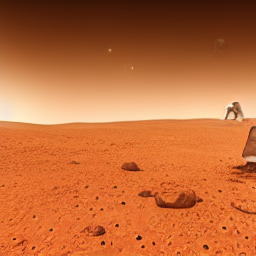

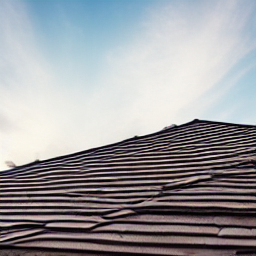

In [39]:
cache.enable()
image = pipe([prompt, "a roof with a ventilator"], width=256, height=256, num_inference_steps=20).images  
display(image[0])
display(image[1])

## Check SD Service

In [ ]:
config = 

In [2]:


config = InferenceExperimentConfiguration()

curr_path = "./"

config.path = os.path.join(curr_path, "inference_data")
config.name = "inference_experiment"
config.overwrite_results = True
experiment = InferenceExperiment(logger, config)
experiment.run()

Generating experiments with factors: ['image_size', 'num_inf_steps'] and levels: [[(512, 512)], [25]]
INFO:__main__:Generating experiments with factors: ['image_size', 'num_inf_steps'] and levels: [[(512, 512)], [25]]
DoE: [[0. 0.]]
INFO:__main__:DoE: [[0. 0.]]
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
Running experiments

INFO:__main__:Running experiments

Running experiment: {'image_size': (512, 512), 'num_inf_steps': 25}
INFO:__main__:Running experiment: {'image_size': (512, 512), 'num_inf_steps': 25}
  0%|          | 0/1 [00:00<?, ?it/s]Running batch with prompt: ['a kitchen', 'space']
INFO:__main__:Running batch with prompt: ['a kitchen', 'space']
100%|██████████| 1/1 [00:39<00:00, 39.40s/it]
Saving results
INFO:__main__:Saving results
Saving results to ./inference_data/repetition_0__image_size_(512, 512)__num_inf_steps_25/results.json
INFO:__main__:Saving results to ./inference_data/repetition_0__image_size_(512, 512)__num_inf_steps_25/results.